In [1]:
# Using regression-data-set.csv find the best fit parameters to
# a, b, c, and d to fit the function y = a + b cos(cx + d)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

In [2]:
# Initial setup

data = pd.read_csv('../regression-data-set.csv')

x_data = np.array(data['x'])
y_data = np.array(data['y'])

In [3]:
# a. do a train/test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [4]:
# b. fit the data using the training set and curve_fit

# curve function
def curve(x, a, b, c, d):
    return a + b * np.cos(c * x + d)

# use curve_fit
popt, pcov = curve_fit(curve, x_train, y_train)

In [5]:
# c. Calculate the MSE with the optimized parameters on the test set
y_predicted = curve(x_test, *popt)

mse = mean_squared_error(y_test, y_predicted)

In [6]:
# d. repeat 100 times and calculate the mean and standard deviation
# of the MSE

# create function to calculate mse based on x and y data
def train_fit_calc_mse(x, y):
    # generate training data
    x_tr, x_ts, y_tr, y_ts = train_test_split(x, y)
    
    # curve_fit based on training data
    coef, cov = curve_fit(curve, x_tr, y_tr)
    
    # get prediced values from generate coefs
    y_pre = curve(x_ts, *coef)
    
    # get mse from predicted data
    mse = mean_squared_error(y_ts, y_pre)
    
    return mse, coef

# initialize errors array
errors = []

# extra arrays for storing coefficients
a = []
b = []
c = []
d = []

# generate 100 error values
for i in range(100):
    mse,coefs = train_fit_calc_mse(x_data, y_data)
    
    errors.append(mse)
    
    a.append(coefs[0])
    b.append(coefs[1])
    c.append(coefs[2])
    d.append(coefs[3])
    
# calculate mean and std from the errors
errors = np.array(errors)
mean = errors.mean()
std = errors.std()

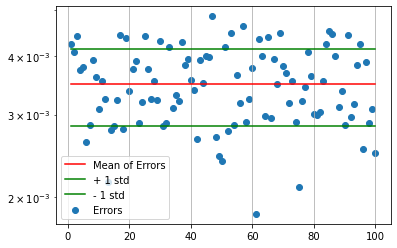

In [7]:
# e. compare results on a single plot

# plot the errors
plt.scatter(np.linspace(1,100,100), errors, label="Errors")

# plot the mean of errors
plt.plot(np.array([1,100]), np.array([mean] * 2), color='red', label="Mean of Errors")

# plot the +/- one std from mean
plt.plot(np.array([1,100]), np.array([mean]*2)+std, color='green', label="+ 1 std")
plt.plot(np.array([1,100]), np.array([mean]*2)-std, color='green', label="- 1 std")

# plot options
plt.legend()
plt.grid()
plt.yscale('log')

# show plot
plt.show()

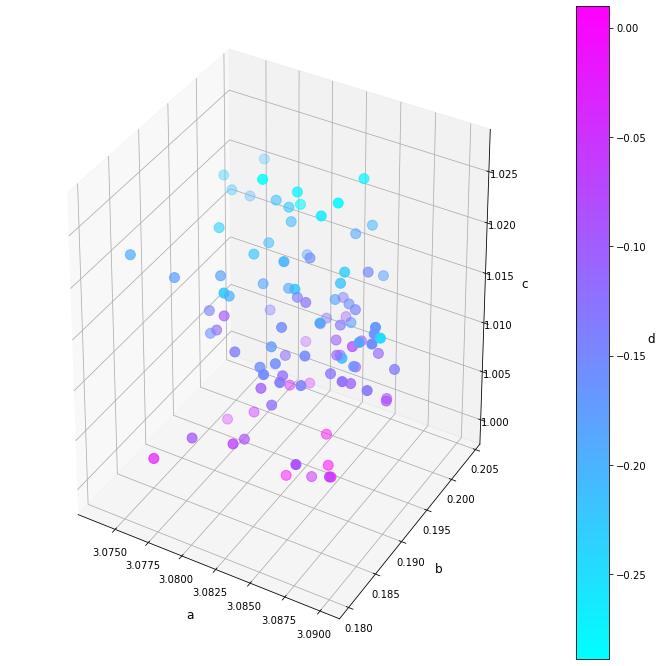

In [8]:
# EXTRA: Generate 4d plot of cofficients used

# convert coef arrays
a = np.array(a)
b = np.array(b)
c = np.array(c)
d = np.array(d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(a,b,c,c=d, cmap=plt.cool(), s=100)
cbar = fig.colorbar(img)
fig.set_size_inches(12,12)
ax.set_xlabel('a', fontsize='large', labelpad=10)
ax.set_ylabel('b', fontsize='large', labelpad=10)
ax.set_zlabel('c', fontsize='large', labelpad=10)
cbar.ax.set_ylabel("d", rotation='horizontal', fontsize='large')
plt.show()